<a href="https://colab.research.google.com/github/PradeepaRW/House_Price_Prediction__using_ANN/blob/main/House_Price_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Process the data

In [324]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [325]:
# Load dataset
df = pd.read_csv("/content/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [326]:
df.shape # dimensions of the dataframe

(13320, 9)

we have 13320 data with, 9 parameters.

In [327]:
df.columns # features

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [328]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [329]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


Drop unwanted features

In [330]:
# Drop irrelevant columns
df.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)

Data cleaning

In [331]:
# Find the features that unavailable in the data
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [332]:
# Drop rows with missing values
df.dropna(inplace=True)

In [333]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [334]:
df.shape

(13246, 5)

In [335]:
# Convert 'size' into BHK (number of bedrooms)
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Check the range of Bedrooms category
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [336]:
# check any mismatches in the features
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [337]:
# Convert 'total_sqft' to numeric (handling ranges)
def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        values = sqft.split('-')
        return (float(values[0]) + float(values[1])) / 2 if len(values) == 2 else None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True)  # Drop rows where conversion failed

# Create price_per_sqft feature
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Encode categorical feature 'location'
# Convert location names to lowercase and remove leading/trailing spaces
df['location'] = df['location'].str.strip().str.lower()

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])



# Select relevant features
features = ['total_sqft', 'BHK', 'bath', 'location']
X = df[features]
df['price'] = np.log1p(df['price'])  # Apply log transformation to price
y = df['price']

df = pd.get_dummies(df, columns=['location'], drop_first=True)  # One-hot encode location



# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessed successfully!")

Data preprocessed successfully!


Build the neural network model

Input Layer      : 4 features (total_sqft, BHK, bath, location) <br>
Hidden Layers    : 2 layers with ReLU activation <br>
Output Layer     : 1 neuron (predicting house price) <br>
Loss Function    : Mean Squared Error (MSE) since this is a regression task <br>
Optimizer        : Adam

In [338]:
pip install --upgrade tensorflow

In [339]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer (Predicting price)
])


from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [340]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [341]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


Train the neural network

In [342]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8.2331 - mae: 2.1651 - val_loss: 0.9746 - val_mae: 0.4029
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.7794 - mae: 0.3544 - val_loss: 0.6500 - val_mae: 0.3172
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.5930 - mae: 0.3068 - val_loss: 0.5291 - val_mae: 0.3032
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5076 - mae: 0.2978 - val_loss: 0.4566 - val_mae: 0.2956
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4490 - mae: 0.2979 - val_loss: 0.4195 - val_mae: 0.3068
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4114 - mae: 0.3011 - val_loss: 0.3878 - val_mae: 0.3067
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3707 - mae: 0.3023 - val_loss: 0.3346 - val_mae: 0.2922
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3362 - mae: 0.2986 - val_loss: 0.3046 - val_mae: 0.2888
Epoch 9/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

 evaluate the model

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error (MAE): 0.28
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.7093


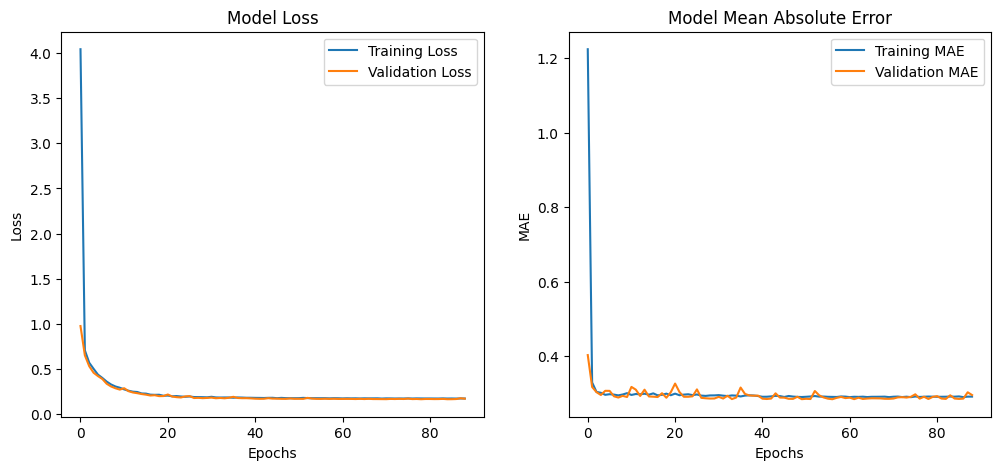

In [344]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    #  Loss Plot
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Model Loss')
    ax[0].legend()

    #  MAE Plot
    ax[1].plot(history.history['mae'], label='Training MAE')
    ax[1].plot(history.history['val_mae'], label='Validation MAE')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('MAE')
    ax[1].set_title('Model Mean Absolute Error')
    ax[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)


In [345]:
model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [346]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

In [347]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [348]:
import mlflow
import mlflow.tracking
from pyngrok import ngrok
import os
import threading


In [349]:
# Kill any running MLflow instances
!pkill -f "mlflow"

# Start MLflow Tracking UI in the background
get_ipython().system_raw("mlflow server --host 127.0.0.1 --port 5000 &")


In [350]:
# Kill any existing ngrok tunnels
ngrok.kill()

# Start ngrok tunnel for port 5000
mlflow_tunnel = ngrok.connect(5000)
print("MLflow Tracking UI:", mlflow_tunnel.public_url)


MLflow Tracking UI: https://be37-34-59-149-75.ngrok-free.app


In [351]:
from pyngrok import ngrok

# Terminate open tunnels if they exist
ngrok.kill()

# Set the Authtoken (Replace with your actual token)
NGROK_AUTH_TOKEN = "2taLgXrk4ORIWg25V8PFsKN7yhT_5vq6gzLrcWid7ANabH4wn"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTP tunnel on port 5000
ngrok_tunnel = ngrok.connect(5000)  # No need for addr, proto, or bind_tls

print("MLflow Tracking UI:", ngrok_tunnel.public_url)


MLflow Tracking UI: https://2fff-34-59-149-75.ngrok-free.app
